In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python matplotlib scikit-learn mediapipe


In [ ]:
pip uninstall numpy


In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        draw_styled_landmarks(image,results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
draw_landmarks(frame,results)

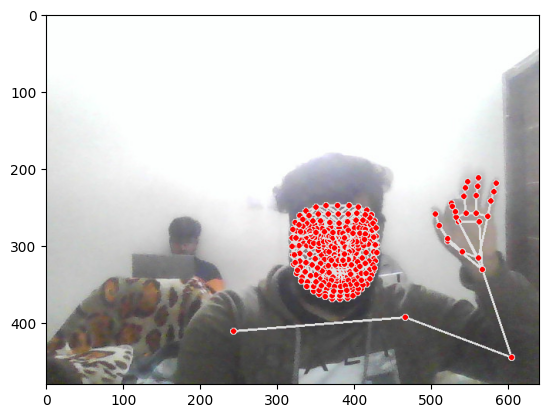

In [13]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# Extracting keypoint values

In [14]:
len(results.pose_landmarks.landmark)

33

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
pose

array([ 6.05755925e-01,  6.48587525e-01, -7.27711976e-01,  9.99939859e-01,
        6.23295546e-01,  5.92428029e-01, -6.73696160e-01,  9.99877095e-01,
        6.36188507e-01,  5.93237042e-01, -6.73618913e-01,  9.99890327e-01,
        6.48101628e-01,  5.94384909e-01, -6.73583150e-01,  9.99870062e-01,
        5.82629263e-01,  5.89925587e-01, -7.14186907e-01,  9.99894619e-01,
        5.65137267e-01,  5.89349687e-01, -7.13913143e-01,  9.99902189e-01,
        5.47416508e-01,  5.89936256e-01, -7.14215577e-01,  9.99891102e-01,
        6.46477878e-01,  6.09337568e-01, -2.94225305e-01,  9.99866664e-01,
        5.06551564e-01,  6.05542481e-01, -4.70433772e-01,  9.99946952e-01,
        6.17771685e-01,  7.02415347e-01, -5.86775661e-01,  9.99890864e-01,
        5.74572027e-01,  6.99118912e-01, -6.36717796e-01,  9.99941707e-01,
        7.28556275e-01,  8.19406569e-01, -4.46898304e-02,  9.99517798e-01,
        3.79738986e-01,  8.57368588e-01, -2.64621764e-01,  9.97131467e-01,
        9.44941163e-01,  

In [18]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.60575593,  0.64858752, -0.72771198, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
468*3+33*4+21*3+21*3

1662

In [23]:
np.save('0', result_test)

In [24]:
np.load('0.npy')

array([ 0.60575593,  0.64858752, -0.72771198, ...,  0.        ,
        0.        ,  0.        ])

# Data collection folder

In [26]:
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [27]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collecting keypoints

In [28]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


In [29]:
cap.release()
cv2.destroyAllWindows()

# Preprocess Data

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(90, 30, 1662)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [41]:
y_test.shape

(5, 3)

# Building and training LSTM Neural network

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [62]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [83]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [64]:
res = [.7, 0.2, 0.1]

In [65]:
actions[np.argmax(res)]

'hello'

In [102]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [103]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 457ms/step - loss: 10.5746 - categorical_accuracy: 0.4403
Epoch 2/2000
3/3 [==============================] - 0s 110ms/step - loss: 17.1065 - categorical_accuracy: 0.5322
Epoch 3/2000
3/3 [==============================] - 0s 105ms/step - loss: 18.9199 - categorical_accuracy: 0.3288
Epoch 4/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.9302 - categorical_accuracy: 0.1390
Epoch 5/2000
3/3 [==============================] - 0s 100ms/step - loss: 3.7344 - categorical_accuracy: 0.2368
Epoch 6/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.6122 - categorical_accuracy: 0.3796
Epoch 7/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.5535 - categorical_accuracy: 0.4344
Epoch 8/2000
3/3 [==============================] - 0s 92ms/step - loss: 2.3212 - categorical_accuracy: 0.3503
Epoch 9/2000
3/3 [==============================] - 0s 91ms/step - loss: 4.6359 - categorical_accuracy: 0

3/3 [==============================] - 0s 111ms/step - loss: 0.5581 - categorical_accuracy: 0.6438
Epoch 74/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4893 - categorical_accuracy: 0.6985
Epoch 75/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.5617 - categorical_accuracy: 0.6966
Epoch 76/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.6000 - categorical_accuracy: 0.6517
Epoch 77/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4909 - categorical_accuracy: 0.6693
Epoch 78/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4405 - categorical_accuracy: 0.6986
Epoch 79/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.5043 - categorical_accuracy: 0.5715
Epoch 80/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.4531 - categorical_accuracy: 0.6556
Epoch 81/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.4650 - categorical_accuracy: 0.616

3/3 [==============================] - 0s 102ms/step - loss: 0.2671 - categorical_accuracy: 0.9060
Epoch 146/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.3710 - categorical_accuracy: 0.8494
Epoch 147/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.3212 - categorical_accuracy: 0.8552
Epoch 148/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.2967 - categorical_accuracy: 0.8689
Epoch 149/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4023 - categorical_accuracy: 0.7769
Epoch 150/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.6031 - categorical_accuracy: 0.7123
Epoch 151/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.6887 - categorical_accuracy: 0.6927
Epoch 152/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.5245 - categorical_accuracy: 0.6517
Epoch 153/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.4777 - categorical_accuracy

Epoch 217/2000
3/3 [==============================] - 0s 92ms/step - loss: 30.6086 - categorical_accuracy: 0.2759
Epoch 218/2000
3/3 [==============================] - 0s 100ms/step - loss: 42.5041 - categorical_accuracy: 0.2857
Epoch 219/2000
3/3 [==============================] - 0s 99ms/step - loss: 36.2733 - categorical_accuracy: 0.3033
Epoch 220/2000
3/3 [==============================] - 0s 99ms/step - loss: 23.2248 - categorical_accuracy: 0.2915
Epoch 221/2000
3/3 [==============================] - 0s 108ms/step - loss: 44.9940 - categorical_accuracy: 0.3327
Epoch 222/2000
3/3 [==============================] - 0s 101ms/step - loss: 33.2092 - categorical_accuracy: 0.3190
Epoch 223/2000
3/3 [==============================] - 0s 96ms/step - loss: 35.8684 - categorical_accuracy: 0.3366
Epoch 224/2000
3/3 [==============================] - 0s 99ms/step - loss: 11.7019 - categorical_accuracy: 0.4227
Epoch 225/2000
3/3 [==============================] - 0s 98ms/step - loss: 16.5652 - 

Epoch 289/2000
3/3 [==============================] - 0s 108ms/step - loss: 2.7427 - categorical_accuracy: 0.2426
Epoch 290/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.6305 - categorical_accuracy: 0.3796
Epoch 291/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.3460 - categorical_accuracy: 0.3522
Epoch 292/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9582 - categorical_accuracy: 0.4070
Epoch 293/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.8301 - categorical_accuracy: 0.5302
Epoch 294/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.8182 - categorical_accuracy: 0.3581
Epoch 295/2000
3/3 [==============================] - 0s 102ms/step - loss: 2.7504 - categorical_accuracy: 0.2876
Epoch 296/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.5598 - categorical_accuracy: 0.3405
Epoch 297/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.1855 - categor

3/3 [==============================] - 0s 95ms/step - loss: 1.1632 - categorical_accuracy: 0.3738
Epoch 362/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.5453 - categorical_accuracy: 0.2466
Epoch 363/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.2370 - categorical_accuracy: 0.3131
Epoch 364/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.3136 - categorical_accuracy: 0.3698
Epoch 365/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.3906 - categorical_accuracy: 0.3503
Epoch 366/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.5902 - categorical_accuracy: 0.3092
Epoch 367/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.8049 - categorical_accuracy: 0.2916
Epoch 368/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.0690 - categorical_accuracy: 0.2681
Epoch 369/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.7243 - categorical_accuracy: 0.26

3/3 [==============================] - 0s 134ms/step - loss: 1.0987 - categorical_accuracy: 0.6165
Epoch 434/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.8399 - categorical_accuracy: 0.6693
Epoch 435/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.7689 - categorical_accuracy: 0.6047
Epoch 436/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.7593 - categorical_accuracy: 0.5578
Epoch 437/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.7168 - categorical_accuracy: 0.6614
Epoch 438/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.7416 - categorical_accuracy: 0.6419
Epoch 439/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.6576 - categorical_accuracy: 0.6908
Epoch 440/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.7159 - categorical_accuracy: 0.6047
Epoch 441/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.6553 - categorical_accura

3/3 [==============================] - 0s 109ms/step - loss: 0.6015 - categorical_accuracy: 0.6810
Epoch 506/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6202 - categorical_accuracy: 0.6712
Epoch 507/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.6192 - categorical_accuracy: 0.6673
Epoch 508/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6915 - categorical_accuracy: 0.6790
Epoch 509/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.7358 - categorical_accuracy: 0.6477
Epoch 510/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.6698 - categorical_accuracy: 0.6751
Epoch 511/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6886 - categorical_accuracy: 0.6751
Epoch 512/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.7854 - categorical_accuracy: 0.6908
Epoch 513/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.7840 - categorical_accuracy: 0.6

3/3 [==============================] - 0s 94ms/step - loss: 0.5878 - categorical_accuracy: 0.6712
Epoch 578/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.5058 - categorical_accuracy: 0.6966
Epoch 579/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.6139 - categorical_accuracy: 0.6145
Epoch 580/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.5557 - categorical_accuracy: 0.6693
Epoch 581/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5529 - categorical_accuracy: 0.6732
Epoch 582/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.5869 - categorical_accuracy: 0.7102
Epoch 583/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1988 - categorical_accuracy: 0.6673
Epoch 584/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.6347 - categorical_accuracy: 0.7162
Epoch 585/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.6773 - categorical_accuracy: 

3/3 [==============================] - 0s 188ms/step - loss: 0.5004 - categorical_accuracy: 0.7398
Epoch 650/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.5693 - categorical_accuracy: 0.6380
Epoch 651/2000
3/3 [==============================] - 0s 132ms/step - loss: 0.5246 - categorical_accuracy: 0.6791
Epoch 652/2000
3/3 [==============================] - 0s 154ms/step - loss: 0.5464 - categorical_accuracy: 0.7397
Epoch 653/2000
3/3 [==============================] - 0s 162ms/step - loss: 0.5672 - categorical_accuracy: 0.7671
Epoch 654/2000
3/3 [==============================] - 0s 163ms/step - loss: 0.5740 - categorical_accuracy: 0.7260
Epoch 655/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.6203 - categorical_accuracy: 0.6790
Epoch 656/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.8990 - categorical_accuracy: 0.6751
Epoch 657/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9638 - categorical_accura

3/3 [==============================] - 0s 99ms/step - loss: 0.5652 - categorical_accuracy: 0.7124
Epoch 722/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4599 - categorical_accuracy: 0.7808
Epoch 723/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.5291 - categorical_accuracy: 0.7202
Epoch 724/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.5013 - categorical_accuracy: 0.8180
Epoch 725/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.6010 - categorical_accuracy: 0.6772
Epoch 726/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.6474 - categorical_accuracy: 0.7789
Epoch 727/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6071 - categorical_accuracy: 0.6830
Epoch 728/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4152 - categorical_accuracy: 0.8121
Epoch 729/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.5242 - categorical_accuracy: 

Epoch 793/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.3193 - categorical_accuracy: 0.9061
Epoch 794/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.4179 - categorical_accuracy: 0.8415
Epoch 795/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.3368 - categorical_accuracy: 0.8826
Epoch 796/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3648 - categorical_accuracy: 0.8826
Epoch 797/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.3019 - categorical_accuracy: 0.8884
Epoch 798/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3551 - categorical_accuracy: 0.8904
Epoch 799/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.5102 - categorical_accuracy: 0.7809
Epoch 800/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3088 - categorical_accuracy: 0.9256
Epoch 801/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4829 - categorica

3/3 [==============================] - 0s 100ms/step - loss: 0.3224 - categorical_accuracy: 0.9041
Epoch 866/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3653 - categorical_accuracy: 0.8650
Epoch 867/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.3190 - categorical_accuracy: 0.8845
Epoch 868/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.9401 - categorical_accuracy: 0.6987
Epoch 869/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.1976 - categorical_accuracy: 0.7124
Epoch 870/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.7941 - categorical_accuracy: 0.7418
Epoch 871/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.6238 - categorical_accuracy: 0.7378
Epoch 872/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.4901 - categorical_accuracy: 0.8005
Epoch 873/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.3190 - categorical_accuracy: 0

KeyboardInterrupt: 

In [104]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_7 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# Predictions

In [105]:
res = model.predict(X_test)

In [106]:
actions[np.argmax(res[4])]

'iloveyou'

In [107]:
actions[np.argmax(y_test[4])]

'iloveyou'

# Saving Weights

In [108]:
model.save('action.h5')

In [78]:
del model

In [80]:
model.load_weights('action.h5')

NameError: name 'model' is not defined

# Evaluation using confusion matrix

In [141]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [142]:
yhat = model.predict(X_train)

In [143]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [144]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  1],
        [ 7, 21]],

       [[54,  1],
        [ 1, 29]],

       [[51,  7],
        [ 1, 26]]], dtype=int64)

In [145]:
accuracy_score(ytrue, yhat)

0.8941176470588236

# Test in Real Time

In [134]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

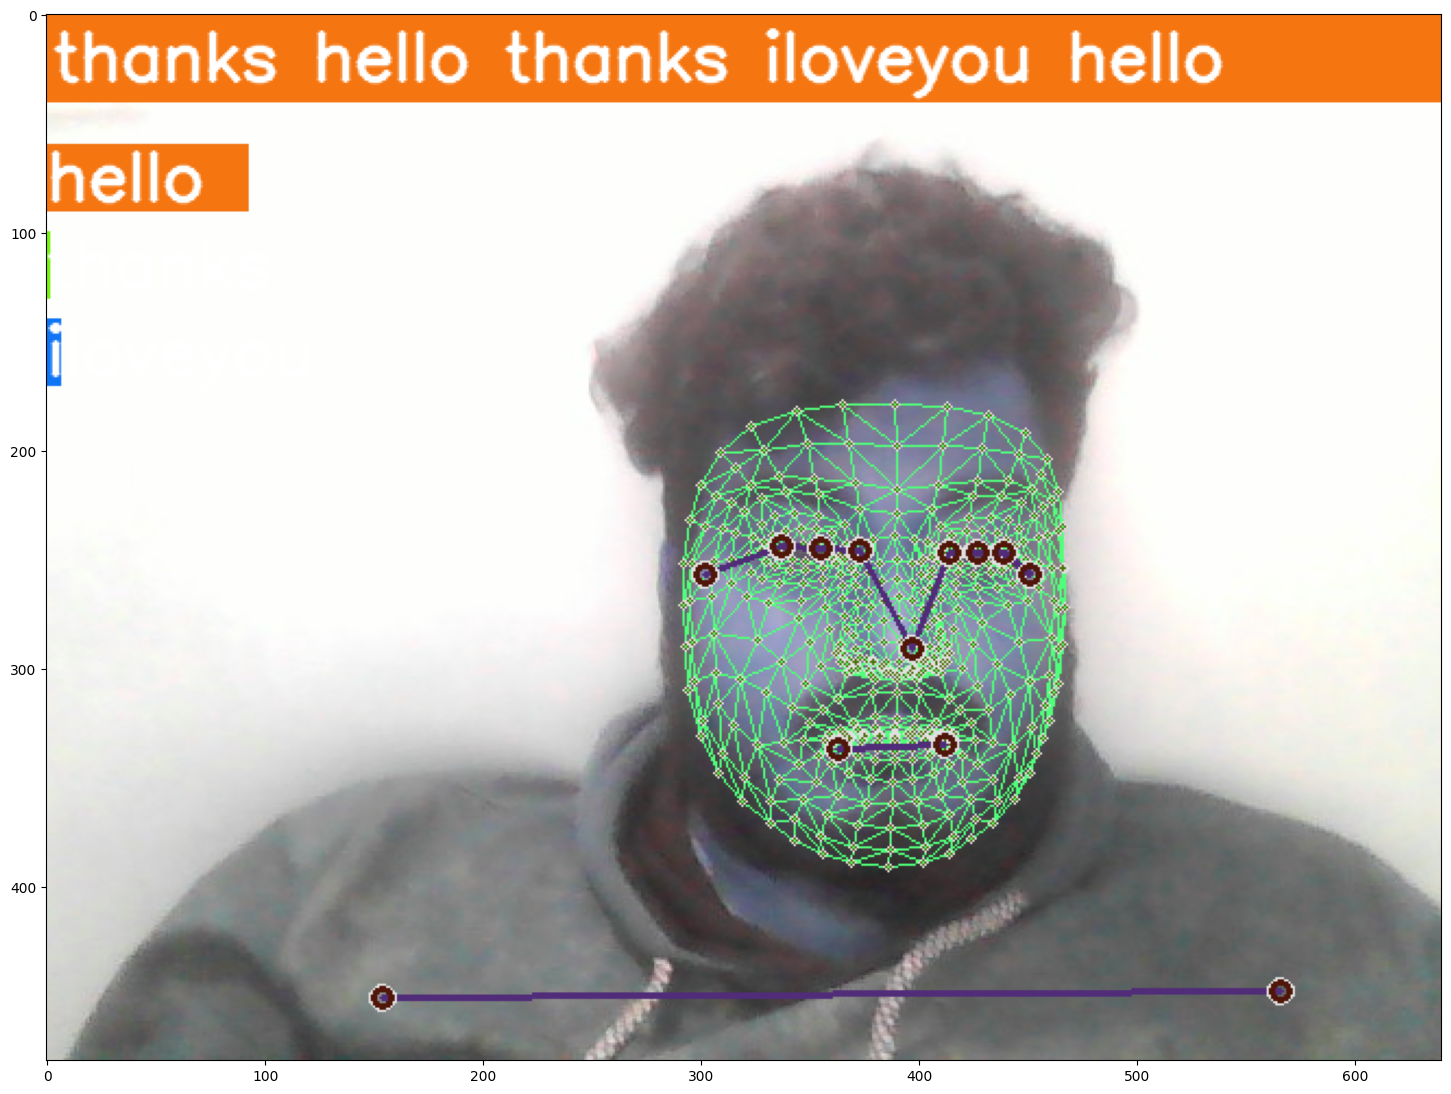

In [135]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [133]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<cla

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.pyth